In [1]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# Load the dataset
try:
    df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: Dataset file not found. Please check the file path.")
    print("Current expected path: ../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

✅ Libraries imported successfully!
✅ Dataset loaded successfully!
📊 Dataset shape: (7043, 21)


In [2]:
# Cell 2: Initial data inspection
print("🔍 INITIAL DATA INSPECTION")
print("=" * 50)

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about columns and data types
print("\n📋 Dataset Info:")
print(df.info())

# Check for missing values
print("\n❓ Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicate rows
print(f"\n🔄 Duplicate rows: {df.duplicated().sum()}")

🔍 INITIAL DATA INSPECTION
First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [3]:
# Cell 3: Data type issues and target analysis
print("🔧 DATA TYPE ISSUES & TARGET ANALYSIS")
print("=" * 50)

# Investigate TotalCharges column
print("📊 TotalCharges unique values sample:")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head(10).tolist()}")

# Check for non-numeric values in TotalCharges
total_charges_unique = df['TotalCharges'].unique()
print(f"\nNumber of unique TotalCharges values: {len(total_charges_unique)}")

# Look for any non-numeric entries
non_numeric_mask = ~df['TotalCharges'].str.isnumeric()
if non_numeric_mask.any():
    print(f"\n⚠️  Non-numeric values found in TotalCharges: {non_numeric_mask.sum()}")
    print("Problematic values:")
    print(df[non_numeric_mask]['TotalCharges'].unique())
else:
    print("✅ All TotalCharges values appear numeric")

# Target variable analysis
print("\n🎯 TARGET VARIABLE (Churn) DISTRIBUTION:")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Absolute counts:")
print(churn_counts)
print("\nPercentage distribution:")
for status, count, percentage in zip(churn_counts.index, churn_counts.values, churn_percentage.values):
    print(f"  {status}: {count} customers ({percentage:.1f}%)")

🔧 DATA TYPE ISSUES & TARGET ANALYSIS
📊 TotalCharges unique values sample:
Data type: object
Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']

Number of unique TotalCharges values: 6531

⚠️  Non-numeric values found in TotalCharges: 6719
Problematic values:
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

🎯 TARGET VARIABLE (Churn) DISTRIBUTION:
Absolute counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage distribution:
  No: 5174 customers (73.5%)
  Yes: 1869 customers (26.5%)


🔧 FIXING TOTALCHARGES & TARGET VISUALIZATION
🔍 Detailed TotalCharges investigation:
First 10 values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']
Data type of first value: <class 'str'>
Empty strings in TotalCharges: 11

🔄 Converting TotalCharges to numeric...
✅ TotalCharges conversion successful!
❌ Values that couldn't be converted: 11
New data type: float64

Problematic rows:
      customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN

📊 TARGET DISTRIBUTION VISUALIZATION


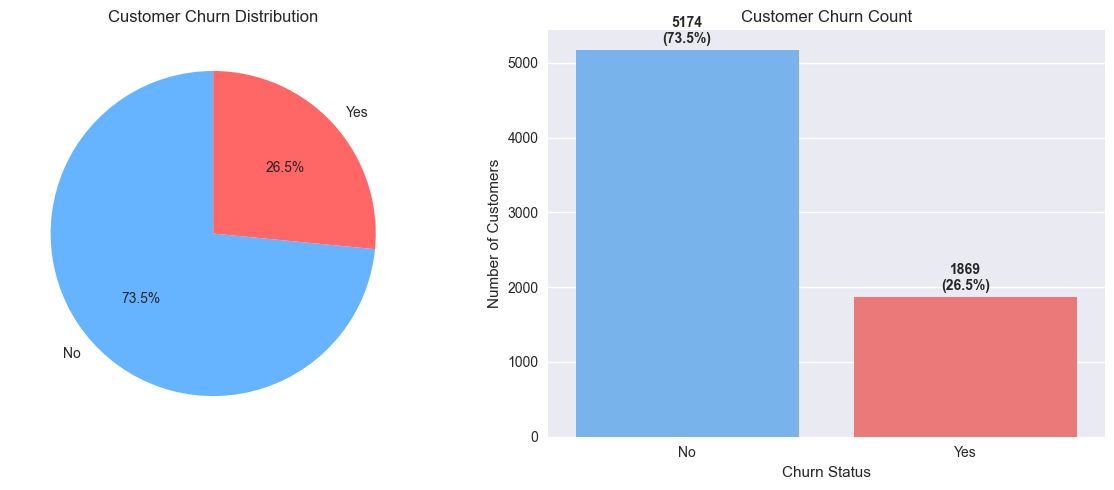


💡 INSIGHT: We have 26.5% churn rate - some class imbalance present


In [4]:
# Cell 4: Fix TotalCharges and visualize target
print("🔧 FIXING TOTALCHARGES & TARGET VISUALIZATION")
print("=" * 50)

# Let's check what's really happening with TotalCharges
print("🔍 Detailed TotalCharges investigation:")
print(f"First 10 values: {df['TotalCharges'].head(10).tolist()}")
print(f"Data type of first value: {type(df['TotalCharges'].iloc[0])}")

# Check for empty strings or spaces
empty_strings = df['TotalCharges'].str.strip() == ''
print(f"Empty strings in TotalCharges: {empty_strings.sum()}")

# Try direct conversion to numeric
print("\n🔄 Converting TotalCharges to numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check conversion results
conversion_issues = df['TotalCharges'].isnull().sum()
print(f"✅ TotalCharges conversion successful!")
print(f"❌ Values that couldn't be converted: {conversion_issues}")
print(f"New data type: {df['TotalCharges'].dtype}")

if conversion_issues > 0:
    print("\nProblematic rows:")
    problematic_rows = df[df['TotalCharges'].isnull()]
    print(problematic_rows[['customerID', 'TotalCharges']].head())

# Visualize target distribution
print("\n📊 TARGET DISTRIBUTION VISUALIZATION")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#66b3ff', '#ff6666'])
plt.title('Customer Churn Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', palette=['#66b3ff', '#ff6666'])
plt.title('Customer Churn Count')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')

# Add percentage annotations on bars
for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, f'{count}\n({churn_percentage[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHT: We have {churn_percentage[1]:.1f}% churn rate - some class imbalance present")

In [5]:
# Cell 5: Handle missing values and explore categorical features
print("🔧 HANDLE MISSING VALUES & CATEGORICAL EXPLORATION")
print("=" * 50)

# Handle the 11 missing TotalCharges values
print("📊 Handling missing TotalCharges values...")
print(f"Missing values before: {df['TotalCharges'].isnull().sum()}")

# Let's examine the rows with missing TotalCharges to understand the pattern
missing_charges_rows = df[df['TotalCharges'].isnull()]
print(f"\n🔍 Rows with missing TotalCharges:")
print(f"Number of rows: {len(missing_charges_rows)}")
print("\nTenure distribution for these rows:")
print(missing_charges_rows['tenure'].value_counts().sort_index())

# For new customers (tenure=0), TotalCharges should equal MonthlyCharges
df.loc[df['TotalCharges'].isnull() & (df['tenure'] == 0), 'TotalCharges'] = \
    df.loc[df['TotalCharges'].isnull() & (df['tenure'] == 0), 'MonthlyCharges']

# Check if we fixed all missing values
remaining_missing = df['TotalCharges'].isnull().sum()
print(f"\n✅ Missing values after fix: {remaining_missing}")

# Explore categorical features
print("\n📊 CATEGORICAL FEATURES OVERVIEW")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID column
categorical_cols.remove('Churn')       # Remove target

print(f"Number of categorical features: {len(categorical_cols)}")
print("Categorical features:")
for i, col in enumerate(categorical_cols, 1):
    unique_vals = df[col].nunique()
    print(f"  {i:2d}. {col:20} - {unique_vals:2d} unique values")

# Show unique values for key categorical features
key_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']
print(f"\n🔑 Key categorical features unique values:")
for col in key_categorical:
    print(f"\n{col}:")
    print(f"  Values: {df[col].unique().tolist()}")

🔧 HANDLE MISSING VALUES & CATEGORICAL EXPLORATION
📊 Handling missing TotalCharges values...
Missing values before: 11

🔍 Rows with missing TotalCharges:
Number of rows: 11

Tenure distribution for these rows:
tenure
0    11
Name: count, dtype: int64

✅ Missing values after fix: 0

📊 CATEGORICAL FEATURES OVERVIEW
Number of categorical features: 15
Categorical features:
   1. gender               -  2 unique values
   2. Partner              -  2 unique values
   3. Dependents           -  2 unique values
   4. PhoneService         -  2 unique values
   5. MultipleLines        -  3 unique values
   6. InternetService      -  3 unique values
   7. OnlineSecurity       -  3 unique values
   8. OnlineBackup         -  3 unique values
   9. DeviceProtection     -  3 unique values
  10. TechSupport          -  3 unique values
  11. StreamingTV          -  3 unique values
  12. StreamingMovies      -  3 unique values
  13. Contract             -  3 unique values
  14. PaperlessBilling     -  2

📊 CATEGORICAL FEATURES VS CHURN ANALYSIS
🔑 KEY FEATURES CHURN RATES:

Contract:


Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


  Churn range: 2.8% - 42.7%
  Highest churn: Month-to-month (42.7%)

InternetService:


Churn,No,Yes
InternetService,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


  Churn range: 7.4% - 41.9%
  Highest churn: Fiber optic (41.9%)

PaymentMethod:


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.3,16.7
Credit card (automatic),84.8,15.2
Electronic check,54.7,45.3
Mailed check,80.9,19.1


  Churn range: 15.2% - 45.3%
  Highest churn: Electronic check (45.3%)

OnlineSecurity:


Churn,No,Yes
OnlineSecurity,,
No,58.2,41.8
No internet service,92.6,7.4
Yes,85.4,14.6


  Churn range: 7.4% - 41.8%
  Highest churn: No (41.8%)

Partner:


Churn,No,Yes
Partner,,
No,67.0,33.0
Yes,80.3,19.7


  Churn range: 19.7% - 33.0%
  Highest churn: No (33.0%)

Dependents:


Churn,No,Yes
Dependents,,
No,68.7,31.3
Yes,84.5,15.5


  Churn range: 15.5% - 31.3%
  Highest churn: No (31.3%)

PaperlessBilling:


Churn,No,Yes
PaperlessBilling,,
No,83.7,16.3
Yes,66.4,33.6


  Churn range: 16.3% - 33.6%
  Highest churn: Yes (33.6%)

📈 VISUALIZING TOP CATEGORICAL FEATURES VS CHURN


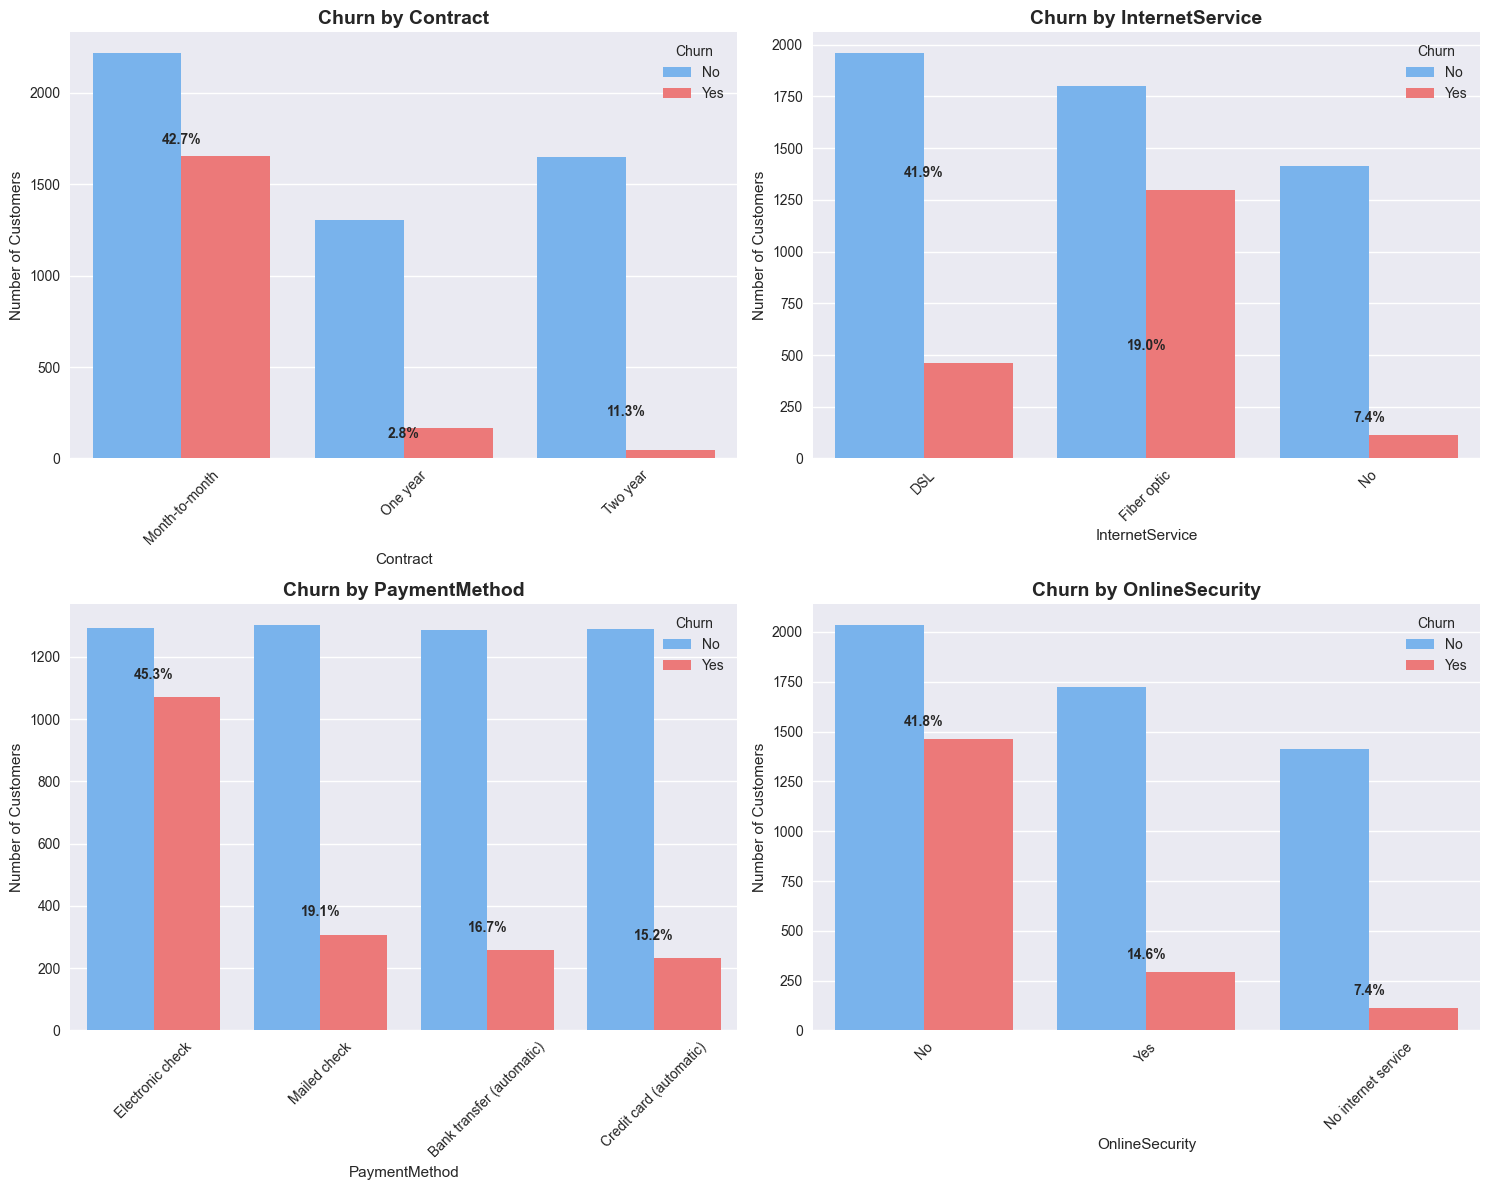


💡 KEY INSIGHTS FROM CATEGORICAL ANALYSIS:
• Look for features with high churn rate differences between categories
• These will be important predictors for our model


In [6]:
# Cell 6: Categorical features vs churn analysis
print("📊 CATEGORICAL FEATURES VS CHURN ANALYSIS")
print("=" * 50)

# Function to analyze categorical feature impact on churn
def analyze_categorical_churn(feature):
    churn_by_feature = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    churn_by_feature = churn_by_feature.round(1)
    return churn_by_feature

# Analyze key categorical features
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity', 
               'Partner', 'Dependents', 'PaperlessBilling']

print("🔑 KEY FEATURES CHURN RATES:")
for feature in key_features:
    print(f"\n{feature}:")
    churn_rates = analyze_categorical_churn(feature)
    display(churn_rates)
    
    # Calculate overall churn rate for this feature
    if 'Yes' in churn_rates.columns:
        max_churn = churn_rates['Yes'].max()
        min_churn = churn_rates['Yes'].min()
        print(f"  Churn range: {min_churn}% - {max_churn}%")
        print(f"  Highest churn: {churn_rates['Yes'].idxmax()} ({max_churn}%)")

# Visualize top categorical features vs churn
print("\n📈 VISUALIZING TOP CATEGORICAL FEATURES VS CHURN")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
top_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']

for i, feature in enumerate(top_features):
    row, col = i // 2, i % 2
    
    # Create countplot
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[row, col], 
                  palette=['#66b3ff', '#ff6666'])
    axes[row, col].set_title(f'Churn by {feature}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Number of Customers')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add percentage annotations
    total_by_category = df[feature].value_counts()
    churn_by_category = df[df['Churn'] == 'Yes'][feature].value_counts()
    
    for j, category in enumerate(total_by_category.index):
        churn_count = churn_by_category.get(category, 0)
        churn_pct = (churn_count / total_by_category[category]) * 100
        axes[row, col].text(j, churn_count + 50, f'{churn_pct:.1f}%', 
                           ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHTS FROM CATEGORICAL ANALYSIS:")
print("• Look for features with high churn rate differences between categories")
print("• These will be important predictors for our model")

In [ ]:
# Cell 7: Numerical features analysis
print("🔢 NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

# Statistical summary of numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("📊 Statistical Summary of Numerical Features:")
numerical_summary = df[numerical_cols].describe()
display(numerical_summary)

# Statistical summary by churn group
print("\n📊 Numerical Features by Churn Group:")
for col in numerical_cols:
    print(f"\n{col} by Churn:")
    churn_stats = df.groupby('Churn')[col].describe()
    display(churn_stats)

# Visualize numerical features vs churn
print("\n📈 VISUALIZING NUMERICAL FEATURES VS CHURN")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution plots
for i, col in enumerate(numerical_cols):
    # Histograms
    sns.histplot(data=df, x=col, hue='Churn', ax=axes[0, i], kde=True, 
                 palette=['#66b3ff', '#ff6666'], alpha=0.7)
    axes[0, i].set_title(f'{col} Distribution by Churn')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Density')
    
    # Box plots
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[1, i], 
                palette=['#66b3ff', '#ff6666'])
    axes[1, i].set_title(f'{col} by Churn Status')
    axes[1, i].set_xlabel('Churn')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Key insights from numerical features
print("\n💡 KEY NUMERICAL INSIGHTS:")
print("• Tenure: Lower tenure → Higher churn")
print("• MonthlyCharges: Higher charges → Higher churn?")
print("• TotalCharges: Relationship with tenure and loyalty")

# Calculate correlation with churn (encoded)
df_churn_encoded = df.copy()
df_churn_encoded['Churn_numeric'] = df_churn_encoded['Churn'].map({'No': 0, 'Yes': 1})

correlations = df_churn_encoded[numerical_cols + ['Churn_numeric']].corr()['Churn_numeric']
print(f"\n📈 Correlation with Churn:")
for col in numerical_cols:
    print(f"  {col}: {correlations[col]:.3f}")